# Finance Data Project


In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [178]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use stooq finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'stooq', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "stooq" MAY NOT ALWAYS WORK.

In [97]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [98]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader('C', 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader('mS', 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)

In [5]:
# Could also do this for a Panel Object


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [99]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] 
# MS

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [102]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks

BAC                                                  C  \
               Open     High      Low    Close        Volume      Open   
Date                                                                     
2006-01-03  39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.1850   
2006-01-04  39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.0370   
2006-01-05  39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.4820   
2006-01-06  39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.1850   
2006-01-09  39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.8280   
...             ...      ...      ...      ...           ...       ...   
2015-12-24  15.1375  15.1918  15.0505  15.0940  3.360696e+07   44.2269   
2015-12-28  15.0505  15.0595  14.8402  14.9716  4.775516e+07   44.3002   
2015-12-29  15.0773  15.1662  15.0002  15.1009  5.220538e+07   44.4606   
2015-12-30  15.0347  15.0683  14.8936  14.9034  4.007305e+07   44.5299   
2015-12-31  14.8678  14.9192  14.7088  14.7088  5.385572e+07   43.8793   

                                                        ...       MS           \
                High       Low     Close        Volume  ...     Open     High   
Date                                                    ...                     
2006-01-03  413.3440  402.7190  412.6110  1.836840e+06  ...  37.8570  38.7278   
2006-01-04  411.0270  404.7190  404.9870  2.235056e+06  ...  38.8704  39.2548   
2006-01-05  408.3340  405.1550  406.9770  1.356199e+06  ...  38.6386  38.7991   
2006-01-06  409.3240  403.4810  406.9770  1.636869e+06  ...  38.9170  38.9665   
2006-01-09  407.9970  404.3030  405.0660  2.007837e+06  ...  38.8199  39.2617   
...              ...       ...       ...           ...  ...      ...      ...   
2015-12-24   44.6388   44.2011   44.4170  5.543171e+06  ...  27.4180  27.5379   
2015-12-28   44.3002   43.7872   44.1397  1.039563e+07  ...  27.2437  27.2437   
2015-12-29   44.8488   44.4428   44.6477  1.204887e+07  ...  27.3071  27.5300   
2015-12-30   44.6131   44.0328   44.0734  1.039755e+07  ...  27.3626  27.4834   
2015-12-31   44.1477   43.6090   43.6090  1.337573e+07  ...  26.8603  27.1912   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04  38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05  38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06  38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09  38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   
...             ...      ...           ...      ...      ...      ...   
2015-12-24  27.3071  27.3437  3.323855e+06  45.1185  45.2158  44.9050   
2015-12-28  26.8960  27.0812  6.438587e+06  44.7719  44.9616  44.4620   
2015-12-29  27.2120  27.4012  7.588402e+06  45.2317  45.4303  45.1354   
2015-12-30  27.1080  27.1327  6.007253e+06  45.3638  45.3966  44.9725   
2015-12-31  26.7434  26.7801  9.680018e+06  44.7431  45.1016  44.5007   

                                   
              Close        Volume  
Date                               
2006-01-03  23.1060  1.520929e+07  
2006-01-04  22.8378  1.500717e+07  
2006-01-05  22.8150  1.398718e+07  
2006-01-06  22.9451  1.160232e+07  
2006-01-09  22.9451  7.758446e+06  
...             ...           ...  
2015-12-24  44.9933  6.091038e+06  
2015-12-28  44.8821  1.009848e+07  
2015-12-29  45.3797  9.618722e+06  
2015-12-30  45.0519  9.767239e+06  
2015-12-31  44.6179  1.331585e+07  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [103]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [104]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  424.86  428.12   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  423.66  425.72   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  419.98  422.93   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  423.82  423.96   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  421.37  422.58   

Bank Ticker                                ...          MS                  \
Stock Info      Low   Close     Volume     ...        Open    High     Low   
Date                                       ...                               
2006-01-03   417.12  427.37  1773436.0     ...      39.082  39.981  38.782   
2006-01-04   419.19  419.46  2157907.0     ...      40.128  40.524  39.888   
2006-01-05   419.64  421.52  1309385.0     ...      39.888  40.053  39.656   
2006-01-06   417.91  421.52  1580368.0     ...      40.175  40.226  39.683   
2006-01-09   418.76  419.55  1938531.0     ...      40.075  40.532  40.068   

Bank Ticker                        WFC                                      
Stock Info    Close     Volume    Open    High     Low   Close      Volume  
Date                                                                        
2006-01-03   39.856  6529839.0  23.367  23.646  23.072  23.588  14898523.0  
2006-01-04   39.888  9688256.0  23.511  23.526  23.187  23.315  14700535.0  
2006-01-05   39.997  7016817.0  23.292  23.329  23.149  23.292  13701382.0  
2006-01-06   40.037  8366983.0  23.354  23.492  23.211  23.423  11365256.0  
2006-01-09   40.456  5033086.0  23.423  23.526  23.329  23.423   7599922.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

Bank Ticker
BAC     47.505
C      489.090
GS     210.170
JPM     59.322
MS      61.043
WFC     48.384
dtype: float64

In [191]:
# bank_stocks.xs
bank_stocks.xs(key='Close', level='Stock Info', axis=1 ).max()
# bank_stocks.columns.levels


Bank Ticker
BAC     46.4714
C      472.2140
GS     205.0270
JPM     57.6748
MS      59.1303
WFC     47.3958
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [116]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018509,-0.013638,-0.014266,0.000803,-0.011574
2006-01-05,0.001315,0.004911,-0.000371,0.003070,0.002733,-0.000986
2006-01-06,-0.001536,0.000000,0.013925,0.007063,0.001000,0.005624
2006-01-09,0.000670,-0.004674,0.011994,0.016230,0.010465,0.000000


In [166]:
df = bank_stocks.xs(key='Close', level='Stock Info', axis=1 )
df.pct_change()
# bank_stocks['BAC']
for t in tickers:
    returns[t +' Return'] = bank_stocks[t]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

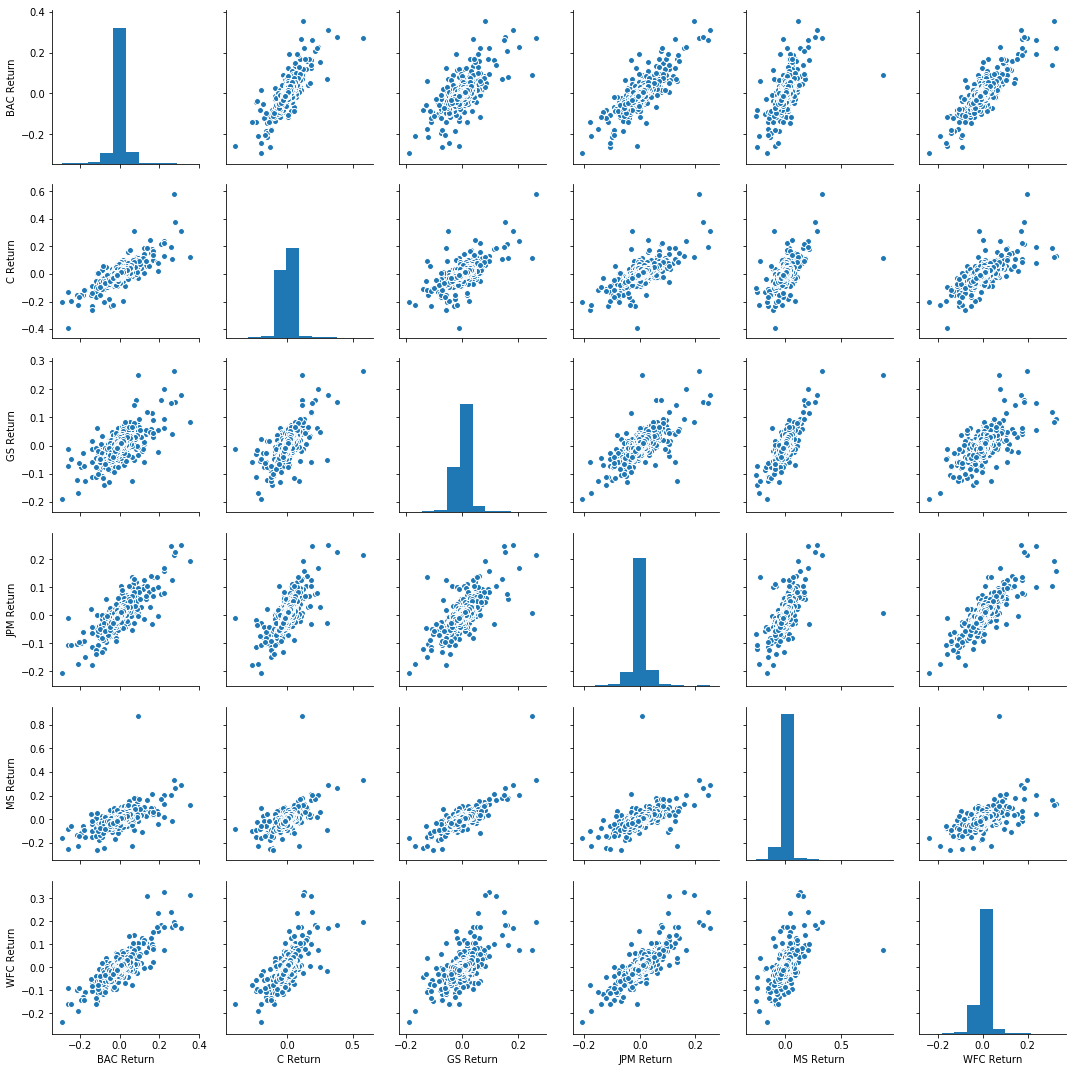

In [13]:
#returns[1:]


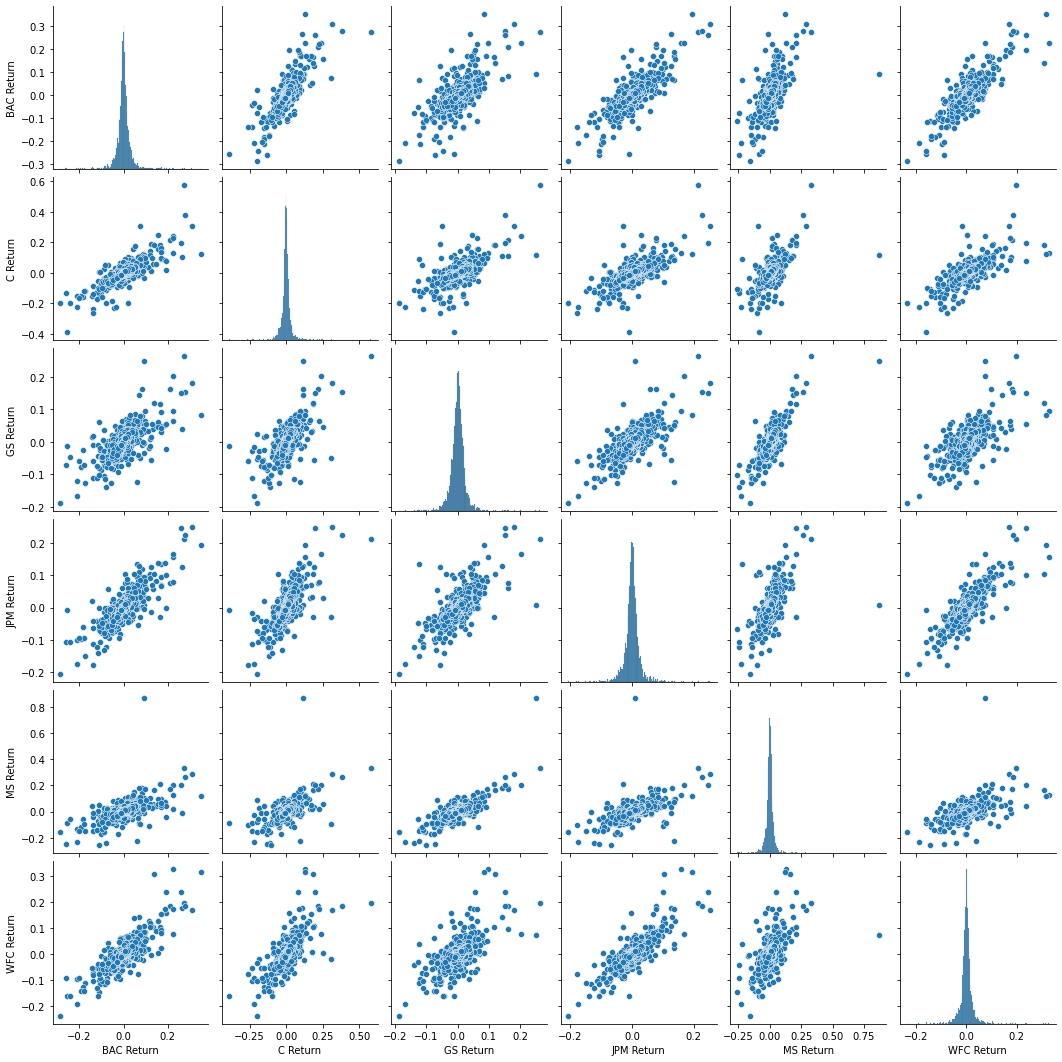

In [187]:
sns.pairplot(returns)
# returns

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
# Worst Drop (4 of them on Inauguration day)


BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [270]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [271]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [15]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.


BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
 # Citigroup riskiest

BAC Return    0.036605
C Return      0.038615
GS Return     0.025369
JPM Return    0.027669
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [210]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [17]:
 # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016149
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016008
WFC Return    0.012547
dtype: float64

In [246]:
return2015 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x: x.year==2015)].std()

In [252]:
return2015

Date          104 days 20:04:55.551720886
BAC Return                       0.016149
C Return                          0.01528
GS Return                        0.014028
JPM Return                       0.013964
MS Return                        0.016006
WFC Return                       0.012545
dtype: object

In [254]:
return2015 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x: x.year==2015)]
# return2015

,Date,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2265,2015-01-02,0.000583,0.002809,0.002919,0.005004,-0.002310,-0.002198
2266,2015-01-05,-0.028823,-0.031579,-0.031212,-0.031070,-0.031301,-0.027333
2267,2015-01-06,-0.030338,-0.035143,-0.020284,-0.025901,-0.028780,-0.020860
2268,2015-01-07,0.005022,0.009227,0.015123,0.001490,0.014339,0.005916
2269,2015-01-08,0.020460,0.015085,0.015870,0.022313,0.014849,0.022151
...,...,...,...,...,...,...,...
2512,2015-12-24,-0.004104,0.001452,-0.002503,-0.001916,-0.003611,-0.004024
2513,2015-12-28,-0.008109,-0.006243,-0.004702,-0.003286,-0.009600,-0.002471
2514,2015-12-29,0.008636,0.011509,0.010433,0.010305,0.011816,0.011087
2515,2015-12-30,-0.013079,-0.012863,-0.008317,-0.007098,-0.009799,-0.007223


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


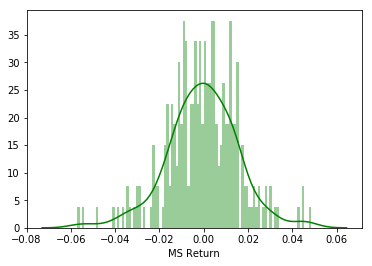

C:\Users\aliha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


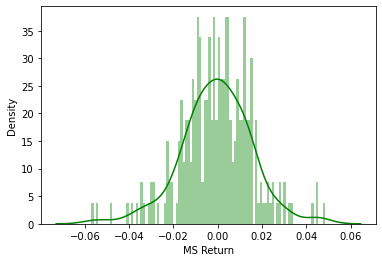

In [261]:
sns.distplot(return2015['MS Return'], bins=100,color='green');
# return2015['MS Return']

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


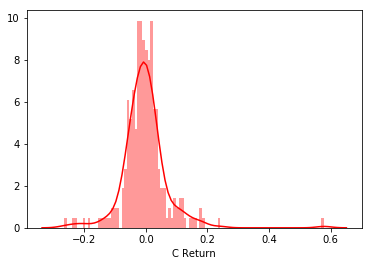

In [268]:
return2008 = returns.reset_index()[returns.reset_index()['Date'].apply(lambda x: x.year==2008)]
return2008

,Date,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
502,2008-01-02,-0.016999,-0.017559,-0.034557,-0.033963,-0.040594,-0.036198
503,2008-01-03,-0.006387,0.000326,-0.013159,-0.006914,-0.000219,-0.019884
504,2008-01-04,-0.011148,-0.023961,-0.024106,-0.022613,-0.032253,-0.036199
505,2008-01-07,0.001319,0.000711,-0.025960,0.010055,-0.020051,0.006931
506,2008-01-08,-0.037341,-0.039514,-0.026950,-0.039717,-0.039587,-0.042603
...,...,...,...,...,...,...,...
750,2008-12-24,0.061426,0.039881,0.016481,0.025512,0.004472,0.018291
751,2008-12-26,-0.012503,-0.007399,-0.006102,-0.001732,0.010192,0.001000
752,2008-12-29,-0.031441,-0.023747,0.007740,-0.000687,0.017037,0.011615
753,2008-12-30,0.023534,0.035020,0.071843,0.041454,0.019419,0.034935


C:\Users\aliha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

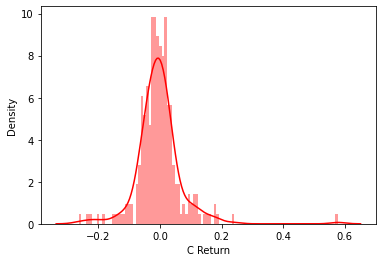

In [269]:
sns.distplot(return2008['C Return'], color='red', bins=100)

In [301]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyrsistent>=0.14.0 in c:\users\aliha\anaconda3\lib\site-packages (from jsonschema!=2.5.0,>=2.4->nbformat>=4.2.0->ipywidgets>=7.0.0->cufflinks) (0.18.0)



  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=b6aa9eced6b096af3c09a2f6306c970ea46e4ec25deaf3599f7579fd0acd0cff
  Stored in directory: c:\users\aliha\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

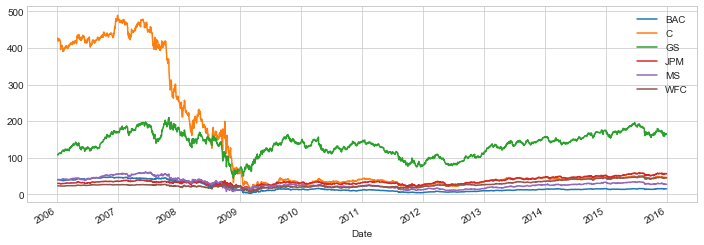

<Figure size 1440x720 with 0 Axes>

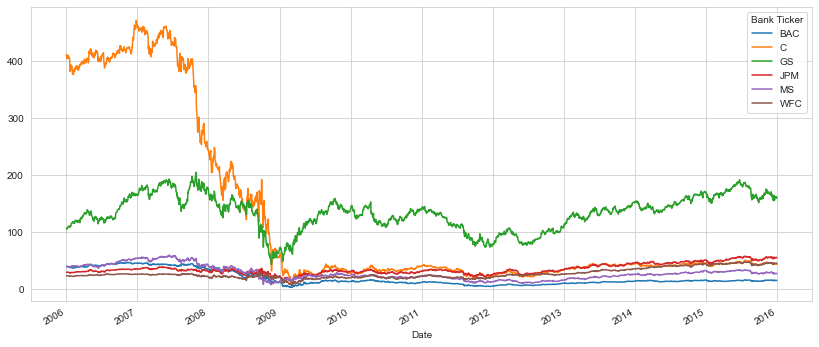

In [305]:
plt.figure(figsize=(20,10))
closed = bank_stocks.xs('Close', level='Stock Info', axis=1).plot(figsize=(14, 6))


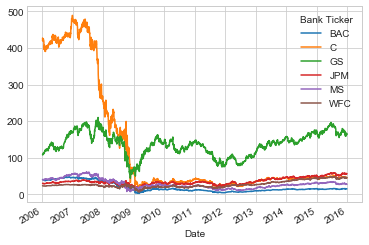

In [303]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

C:\Users\aliha\AppData\Local\Temp/ipykernel_25440/2494955124.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\aliha\AppData\Local\Temp/ipykernel_25440/2494955124.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



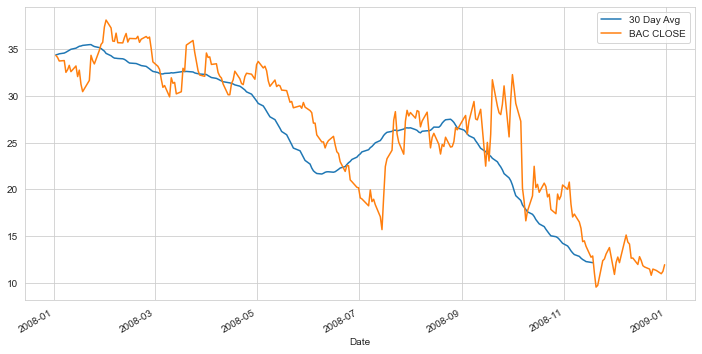

In [306]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

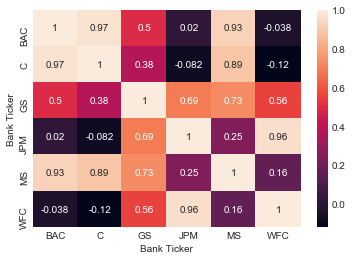

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

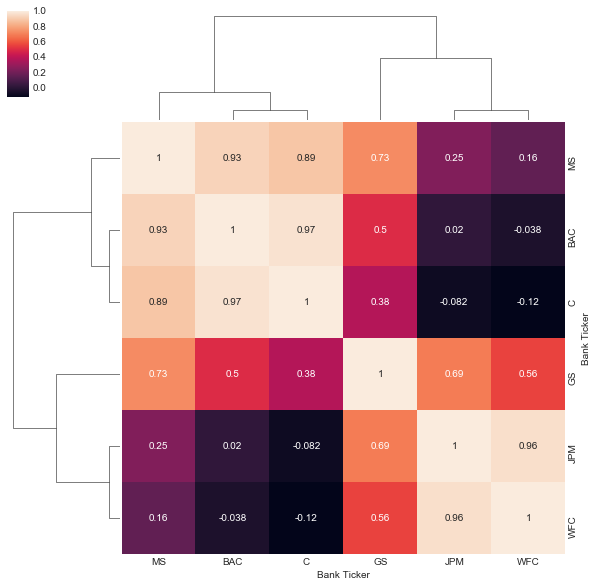

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [28]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [29]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [30]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Good Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oprations.